In [2]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [3]:
# 군집 알고리즘 연습을 위한 예제 데이터 생성
x = np.c_[[4, 20, 3, 19, 17, 8, 19, 18],
         [15, 13, 13, 4, 17, 11, 12, 6]]
x_df = pd.DataFrame(x, columns=['experience', 'violation'])
x_df

,experience,violation
0,4,15
1,20,13
2,3,13
3,19,4
4,17,17
5,8,11
6,19,12
7,18,6


In [4]:
# 파라미터 설정
eps = 5
min_samples = 2

In [5]:
# DBSCAN 군집화 알고리즘 실행
db = DBSCAN(eps=eps, min_samples=min_samples).fit(x)

# core sample들의 indicator
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db.labels_

array([ 0,  1,  0,  2,  1, -1,  1,  2], dtype=int64)

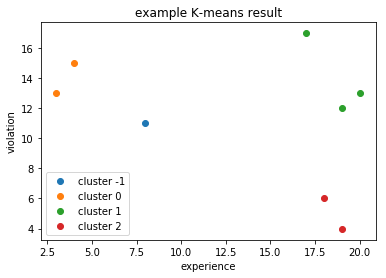

In [6]:
# 군집화 결과 plotting 1
unique_labels = np.unique(db.labels_)  # 군집 종류

for i in unique_labels:  # 각 군집에 대해
    cluster_instance_mask = (db.labels_ == i)
    
    x_cluster_i = x[cluster_instance_mask, :]  # 해당 군집에 해당하는 인스턴스
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

plt.title('example K-means result')
plt.xlabel('experience')
plt.ylabel('violation')
plt.legend()
plt.show()

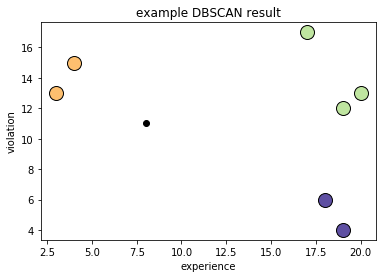

In [7]:
# 군집화 결과 plotting 2
unique_labels = np.unique(db.labels_)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))]

for i, col in zip(unique_labels, colors):
    if i == -1:
        col = [0, 0, 0, 1]  # 데이터 포인트가 noise로 판단될 경우, 데이터 포인트를 검정색으로 표시
    
    class_member_mask = (db.labels_ == i)
    
    xt = x[class_member_mask & core_samples_mask, :]
    plt.plot(xt[:, 0], xt[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
    xt = x[class_member_mask & ~core_samples_mask, :]
    plt.plot(xt[:, 0], xt[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('example DBSCAN result')
plt.xlabel('experience')
plt.ylabel('violation')
plt.show()

In [9]:
""" DBSCAN 군집화가 필요한 경우 """

' DBSCAN 군집화가 필요한 경우 '

In [11]:
x_dbscan_df = pd.read_csv('dataset/dbscan_data.csv', header=None)
x_dbscan_df.head()

,0,1,2
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


In [12]:
x_dbscan = x_dbscan_df.iloc[:, 0:2].values

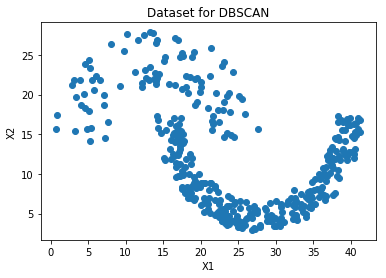

In [13]:
# 전체 데이터 plotting
plt.figure()
plt.scatter(x_dbscan[:, 0], x_dbscan[:, 1])
plt.title('Dataset for DBSCAN')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()